In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [3]:
fig_dir = r"C:\Users\Fabusuyi\Documents\Work _UCT\PG\Write_Up\figs\load_paper"
def save_figure(fname, obj, dir=fig_dir):
    """wrapper to save figure in desied directory"""
    path = os.path.join(os.path.normpath(fig_dir), fname)
    obj.savefig(path)

In [5]:
dt_1 = pd.read_csv('C:/Users/Fabusuyi/Documents/Work _UCT/PG/LTSpice/Electronic Load/load_test/load_measure_1.csv')
dt_1.head()

,v_gs,i_ds,v_pot,v_sense
0,3.513,0.060,0.001,0.003
1,3.612,0.012,0.020,0.005
2,3.650,0.550,0.148,0.024
3,3.725,0.680,0.188,0.030
4,3.725,0.890,0.249,0.039


In [6]:
dt_1.shape

(15, 4)

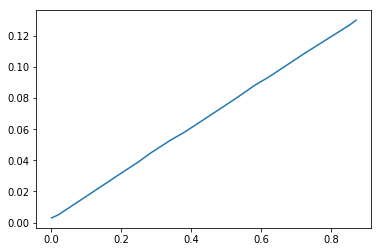

In [7]:
plt.plot(dt_1.v_pot, dt_1.v_sense)


__More cleaning__

In [8]:
dt_1_clean = dt_1.dropna()
np.sum(dt_1_clean.isnull())

v_gs       0
i_ds       0
v_pot      0
v_sense    0
dtype: int64

In [9]:
dt_1_clean.reset_index(drop=1)

,v_gs,i_ds,v_pot,v_sense
0,3.5130,0.060,0.001,0.003
1,3.6120,0.012,0.020,0.005
2,3.6500,0.550,0.148,0.024
3,3.7250,0.680,0.188,0.030
4,3.7250,0.890,0.249,0.039
5,3.7300,1.010,0.286,0.045
6,3.7200,1.190,0.341,0.053
7,3.7500,1.330,0.380,0.058
8,3.7000,1.560,0.448,0.068
9,3.7250,1.820,0.529,0.080


In [10]:
X = dt_1_clean.v_pot.values[:, np.newaxis]
X.shape

(15, 1)

In [11]:
y = dt_1_clean.v_sense
y.shape

(15,)

### comparing v_pot (x-axis) to v_sense (y-axis)

Text(0,0.13,'$i_{DS} = 0.146v_{pot} + 0.0026$')

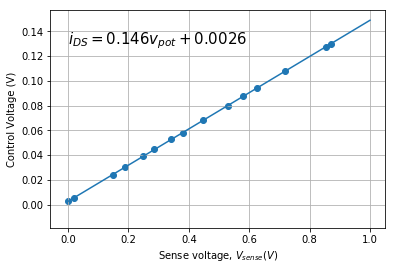

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
fig, ax = plt.subplots()
ax.clear()
ax.scatter(dt_1_clean.v_pot, dt_1_clean.v_sense)
X_test = np.linspace(0, 1.0, 20).reshape((-1, 1))

y_model = model.predict(X_test)
ax.plot(X_test, y_model)

ax.grid()

ax.set_ylabel('Control Voltage (V)')
ax.set_xlabel('Sense voltage, $V_{sense} (V)$')


ax.text(0,0.13, '$i_{DS} = 0.146v_{pot} + 0.0026$', 
       fontdict={'fontsize':15})

In [13]:
model.intercept_, model.coef_[0]

(0.0026051412473512212, 0.14634865041515419)

### Comapring v_pot (x-axis) to i_ds (y-axis)

In [14]:
y_ids = dt_1_clean.i_ds

Text(0,3,'$i_{DS} = 3.369 0.034x$')

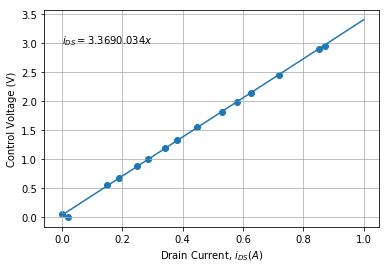

In [15]:
from sklearn.linear_model import LinearRegression
model_2 = LinearRegression()
model_2.fit(X, y_ids)

fig, ax = plt.subplots()
ax.scatter(dt_1_clean.v_pot, dt_1_clean.i_ds)
X_test = np.linspace(0, 1.0, 20).reshape((-1, 1))

y_model = model_2.predict(X_test)
ax.plot(X_test, y_model)
ax.grid()

ax.set_ylabel('Control Voltage (V)')
ax.set_xlabel('Drain Current, $i_{DS} (A)$')


ax.text(0,3, '$i_{DS} = 3.369 0.034x$')

In [16]:
model_2.intercept_, model_2.coef_[0]

(0.034191458908288563, 3.3695299962128362)

### Comapring v_sense (x-axis) to i_ds (y-axis)

In [20]:
y_sense = dt_1_clean.v_sense
X_ids = dt_1_clean.i_ds.values[:, np.newaxis]
X_ids.shape

(15, 1)

Text(0,0.13,'$V_{cont.} = 0.04i_{DS} + 0.001$')

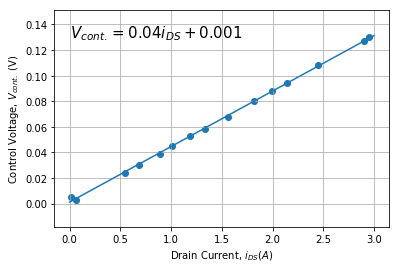

In [21]:
from sklearn.linear_model import LinearRegression
model_3 = LinearRegression()
model_3.fit(X_ids, y_sense)

fig, ax = plt.subplots()
ax.scatter(dt_1_clean.i_ds, dt_1_clean.v_sense)
X_test = np.linspace(0, 3, 20).reshape((-1, 1))

y_model = model_3.predict(X_test)
ax.plot(X_test, y_model)
ax.grid()

ax.set_ylabel('Control Voltage, $V_{cont.}$ (V)')
ax.set_xlabel('Drain Current, $i_{DS} (A)$')


ax.text(0,0.13, '$V_{cont.} = 0.04i_{DS} + 0.001$',
       fontdict={'fontsize':15})

In [22]:
save_figure('v_control_sense.png', fig)

In [23]:
model_3.intercept_, model_3.coef_[0]

(0.0011667989477151877, 0.043400428004099587)